## Neo4j

## Short intro to graph theory

To understand Neo4j you need some intuition to graph theory.

Graph theory is the study of graphs (usually called networks in our domain). Graphs are mathematical structures used to model pairwise relations (edges) between object(nodes). A graph can be either undirected (symetrical relation) or directed (asymetrical realtion). An edge connects only two nodes (It can be twice the same node). Here's an example of a graph:

<img src="./img/network.png">

A network can be represented in the three following format:

### Adjacency matrix
A network can be represented as an adjacency matrix. The row names and col names of this matrix is the names of the node. The cells are the relation between nodes. This matrix is symetric if the network is undirected. If directed the rows are the starting point of the edge (also called "source") and the columns are the end ("target"). Here's the adjacency matrix for the previous network:

/  | Spider-man | Nick Fury | Capitain America | Iron man | 
--- | --- | --- | --- | --- |
Spider-man | 0 | 0 | 0 | 0 |
Nick Fury | 1 | 0 | 0 | 0 |
Capitain America | 1 | 1 | 0 | 1 |
Iron man | 1 | 1 | 0 | 0 |

### Edge list

An edge list is composed of three columns: A source, a target and a weight. In others words we focus on the edge instead of the node. A source is the node from which the edge is going out and the target the node where the edge comes in. Here's the edge list of the previous network:

| Source | Target | Weight | 
| --- | --- | --- |
| Nick Fury | Spider-man | 1 |
| Capitain America | Spider-man | 1 |
| Capitain America | Nick Fury | 1 |
| Capitain America | Iron man | 1 |
| Iron man | Spider-man | 1 |
| Iron man | Nick Fury | 1 |

### Incidence matrix

An incidence matrix is probably the less used format. It's a matrix where the columns are the edges and the rows the nodes.


/  | edge 1 | edge 2 | edge 3 | edge 4 | edge 5 | edge 6 | 
--- | --- | --- | --- | --- | --- | --- |
Spider-man | 0 | -1 | 0 | 0 | -1 | -1 |
Nick Fury | -1 | 0 | 0 | -1 | 0 | 1 |
Capitain America | 1 | 1 | 1 | 0 | 0 | 0 |
Iron man | 0 | 0 | -1 | 1 | 1 | 0 |


## Neo4j DB

The last chapter we worked on a document store architecture noSQL DB. Now we will focus our attention on a graph database.
If you followed the instructions of the readme you should be able to do the next steps.

First thing to do is to change the db. with neo4j to change the database you will access through the browser you need to change the conf file: conf/neo4j.conf

Open this file with a text editor and add this next line:
```
dbms.active_database = tutorial
```

Once this is done you can go to the bin file of neo4j (if you added it to the path you can run it from anywhere)
```
start neo4j console
```

goto:
http://localhost:7474/


On this url you will be prompted to enter your username and password. default username,dbname and password is neo4j.

For the good of the lecture I used the username "tutorial" and password "password_tuts". Either use the same dbname and password than me or try to change the parameters when needed (recommended).

If you have small example or you are in developpment the browser is really a nice way to get more familiar with neo4j but when you scale up your application or want to retrieve data and perform different algorithm its easier to work directly on python. If you want the browser serves the same utility as DB Browser or MongoDB compass.

In [ ]:
import py2neo

# Connect to graph db , default is auth=("neo4j", "neo4j")
# to change default auth just go to the localhost

graph = py2neo.Graph("bolt://localhost:7687", auth=("tutorial", "password_tuts"), name="tutorial")
graph.delete_all()


In [ ]:
# First steps in py2neo

import py2neo

# Connect to graph db , default is auth=("neo4j", "neo4j")
# to change default auth just go to the localhost

graph = py2neo.Graph("bolt://localhost:7687", auth=("tutorial", "password_tuts"), name="tutorial")
graph.delete_all()
# Node method: first argument is Node label and then arbitrary number of characteristics
Person1 = py2neo.Node("Person", name="Person1", age = 25, hobbies = "foot") 
Person2 = py2neo.Node("Person", name="Person2", age = 27)
Person3 = py2neo.Node("Person", name="Person3", age = 24)

ab = py2neo.Relationship(Person1, "COLLABORATED", Person2, n_collab = 3)
ba = py2neo.Relationship(Person2, "COLLABORATED", Person1, n_collab = 3)
# You need to commit these node before they appear in the db
# We will do that by using a transaction


transaction = graph.begin()
transaction.create(Person1|Person2|Person3)
transaction.create(ab)
transaction.create(ba)
transaction.commit()

print(graph.exists(ab))

You can also create your own class of node type with specific argument (more structured).

In [ ]:
import py2neo
from py2neo import ogm
import numpy as np
import tqdm

graph = py2neo.Graph("bolt://localhost:7687", auth=("tutorial", "password_tuts"), name="tutorial")
# Delete every node and relation
graph.delete_all()

# The class Person will inherit from ogm.GraphObject
class Person(ogm.GraphObject):
    __primarykey__ = "id_"
    
    id_ = ogm.Property()
    name = ogm.Property()
    age = ogm.Property()
    
    def __init__(self):
        self.node = self.__ogm__.node

# Init dict with the different name for random attribution     
names = {"0":"Person1",
        "1":"Person2",
        "2":"Person3"}
# Init the transaction or you will insert every node one by one which is really slow.
transaction = graph.begin()
iteration = 0
for i in tqdm.tqdm(range(1000)):
    # Create instance of class
    ind = Person()
    # Init variable of ind
    ind.id_ = int(iteration)
    name = names[str(np.random.random(3).argmax())]
    ind.name = name
    ind.age = int(np.random.randint(low=20, high=60, size=1)[0])
    
    # init transaction  
    transaction.create(ind.node)
    iteration += 1
    
    # commit transaction and reset it every 1000 iterations
    if (i+1) % 1000 == 0:
        transaction.commit()
        transaction = graph.begin()

Wors pretty well but it is pretty slow. To overcome this problem you can use Cypher queries. Cypher is Neo4j’s graph query language and is way faster than the py2neo wrapper. Cypher is, like SQL, a declarative, textual query language, but for graphs. If you have a small project you can ignore Cypher queries but if you are indeed interested by neo4j I really recommend to learn Cypher queries. We will learn CRUD operation with Cypher queries. https://neo4j.com/docs/cypher-refcard/current/.

### CREATE

In [ ]:
import tqdm
import py2neo
import numpy as np
graph = py2neo.Graph("bolt://localhost:7687", auth=("tutorial", "password_tuts"), name="tutorial")
graph.delete_all()

names = {"0":"Person1",
        "1":"Person2",
        "2":"Person3"}

# Execute a query with graph.run
# Here the query creates a "constraint" on the id_ of the person asking for it to be unique i.e Primary key
try:
    graph.run("CREATE CONSTRAINT ON (:Person) ASSERT n.id_ IS UNIQUE")
except:
    print("Constraint already exists")
    
# init a list of transaction that we will commit at the same time
transaction_list = []

iteration = 0
for i in tqdm.tqdm(range(100000)):
    id_ = iteration
    name = names[str(np.random.random(3).argmax())]
    age = int(np.random.randint(low=20, high=60, size=1)[0])
    # Append a dict, 1 dict per person 
    transaction_list.append({"id_":id_,"name":name,"age":age})
    iteration += 1
    if i % 1000 == 0:
        # To commit a list of transaction with cypher you can use the UNWIND parameter
        # $json => json will be the argument of run with the data
        transaction = "UNWIND $json as data CREATE (n:Person) SET n = data"
        graph.run(transaction, json=transaction_list)
        transaction_list = []

graph.run(transaction, json=transaction_list)

# CREATE Relation

# MATCH search for the pattern described in it
# WHERE = condition
# CREATE an edge (node)-[:Relationtype]-(node2)

for i in range(10):
    query = """MATCH (a:Person),(b:Person)
    WHERE a.id_ = {} AND b.id_ = {}
    CREATE (a)-[r:COLLAB]->(b)
    """.format(str(i),str(i+1))
    graph.run(query)

for i in range(21,25,1):
    query = """MATCH (a:Person),(b:Person)
    WHERE a.id_ = %s AND b.id_ = %s
    CREATE (a)-[:COLLAB {n_collab: %s}]->(b)
    """% (str(i),str(i+1),2)
    graph.run(query)
    

transaction_list = []
    
for i in range(20,40,1):
    transaction_list.append({"id_1":i,"id_2":(i+1)})
    
transaction = """UNWIND $json as data
MATCH (a:Person),(b:Person)
WHERE a.id_ = data.id_1 AND b.id_ = data.id_2
CREATE (a)-[:COLLAB {n_collab: 1}]->(b)
"""
graph.run(transaction, json=transaction_list)
pass
# You can't create an undirected edge but you can have the notion of undirected edges at query time.    

### READ

In [ ]:
# READ

import tqdm
import py2neo

graph = py2neo.Graph("bolt://localhost:7687", auth=("tutorial", "password_tuts"), name="tutorial")

# RETURN returns variable specified

# Count number of observation (n_node) with label Person.
query = """
MATCH(person:Person)
WITH count(person) AS n_node
RETURN n_node
"""
data = graph.run(query)
n_node = next(data)["n_node"]
print(n_node)

# Return every node with Label Person
query = """
MATCH(person:Person)
RETURN person.name AS name, person.age AS age, person.id_ as id_
"""

# Returns a generator
data = graph.run(query)

#iterate through all elements
iteration = 0
pbar = tqdm.tqdm(total=n_node)

for i in range(n_node):
    next(data)
    iteration += 1
    pbar.update(1)

# print last element
print(data["name"])
print(data["age"])
print(data["id_"])

### UPDATE

In [ ]:
## update
#

query = """
    MATCH (person:Person) 
    WHERE person.id_ < 10
    SET person.newobs = %s
    RETURN person.id_, person.newobs
    """ % (43)

df = graph.run(query).to_data_frame()
print(df)

### DELETE

In [ ]:
# Delete
# DETACH to remove edges then DELETE the node
query = """
    MATCH (person:Person) 
    WHERE person.id_ < 10
    DETACH DELETE person
    """ 

graph.run(query)
pass

### A study case

To become more familiar with neo4j we will convert a csv file to a network and do some stats using cypher queries. The data can be found [here](https://www.kaggle.com/dannielr/marvel-superheroes?select=characters.csv) and I stored it in the folder data in github. First thing to do is to switch the DB. We will call it "MCU". Our goal will be to create a node per character and link them by apperance in a comic (Simple binary graph, if they appeared once in the same comic then a link is created). Finally we give each node different properties (power, stats, ....) and finish by doing some query to see basics stats

In [1]:
# initial creation
import pandas as pd
import tqdm
import py2neo

# pandas to read_csv , header = True
characters = pd.read_csv("data/Chap3/Marvel_Superheroes/characters.csv")
graph = py2neo.Graph("bolt://localhost:7687", auth=("tutorial", "password_tuts"), name="mcu")

graph.delete_all()

# CONSTRAINT if condition (here n.id_ is unique) not respected => error
# If constraint already exists pass (IF NOT EXISTS probably works too)
try:
    graph.run("CREATE CONSTRAINT ON (n:Superhero) ASSERT n.id_ IS UNIQUE")
except:
    print("Constraint already exists")

# Init the list that will contains dicts for each node
transaction_list = []

# iterrows = line by line iterators of the df row[0] = id row[1] = the variables in columns
for row in tqdm.tqdm(characters.iterrows()):
    id_ = row[1]["characterID"]
    name = row[1]["name"]
    transaction_list.append({"id_":id_,"name":name})
    # Commit when list = 1000, vary it depending of the case
    if len(transaction_list) == 1000:
        # UNWIND = split the list given to it (here $json because json=transaction_list)
        # For each dict do the following query CREATE (n:Superhero) SET n = data
        transaction = "UNWIND $json as data CREATE (n:Superhero) SET n = data"
        graph.run(transaction, json=transaction_list)
        transaction_list = []

# Some observation left (e.g 7700 node, will commit every 100. so 700 left)
graph.run(transaction, json=transaction_list)

pass

1170it [00:00, 1439.53it/s]


In [2]:
import pandas as pd
import py2neo

stats = pd.read_csv("data/Chap3/Marvel_Superheroes/characters_stats.csv")
graph = py2neo.Graph("bolt://localhost:7687", auth=("tutorial", "password_tuts"), name="mcu")


# OPTIONAL MATCH =>  search for the pattern described in it, while using nulls for missing parts of the pattern.
transaction = """UNWIND $json as data
OPTIONAL MATCH (a:Superhero {name:data.Name})
SET a += {Alignement:data.Alignement,Intelligence:data.Intelligence,Strength:data.Strength,Speed:data.Speed,Durability:data.Durability,
         Power:data.Power,Combat:data.Combat,Total:data.Total} 
"""

transaction_list = []

iteration = 0
for row in tqdm.tqdm(stats.iterrows()):
    transaction_list.append(dict(row[1]))
    iteration += 1
    if iteration % 1000 == 0:
        graph.run(transaction, json=transaction_list)
        transaction_list = []
        
graph.run(transaction, json=transaction_list)

pass

611it [00:00, 3154.07it/s]


In [3]:
# edges
import pandas as pd
import tqdm
import py2neo
import itertools

graph = py2neo.Graph("bolt://localhost:7687", auth=("tutorial", "password_tuts"), name="mcu")

characters2comics = pd.read_csv("data/Chap3/Marvel_Superheroes/charactersToComics.csv")
characters2comics = characters2comics.drop_duplicates()
transaction_list = []

# MERGE = if pattern does not exists ON CREATE
# If pattern exists do ON MATCH



transaction = """UNWIND $json as data
MATCH (a:Superhero),(b:Superhero)
WHERE a.id_ = data.id_1 AND b.id_ = data.id_2
MERGE (a)-[r:RELATION]->(b)
ON CREATE
    SET r.n_collab = 1
ON MATCH
    SET r.n_collab = r.n_collab + 1
"""

it = 0   
for comic in tqdm.tqdm(characters2comics.groupby(["comicID"])):
    related_ids = comic[1]["characterID"]
    for combi in list(itertools.combinations(related_ids, 2)):
        sh1 = combi[0]
        sh2 = combi[1]
        transaction_list.append({"id_1":sh1,"id_2":sh2})
        it +=1
        if it % 1000 == 0:
            graph.run(transaction, json=transaction_list)
            transaction_list = []

graph.run(transaction, json=transaction_list)
pass

100%|███████████████████████████████████████████████████████████████████████████| 22250/22250 [00:29<00:00, 745.70it/s]


In [4]:
# Let's see if everything works well
import py2neo

graph = py2neo.Graph("bolt://localhost:7687", auth=("tutorial", "password_tuts"), name="mcu")

query = """MATCH (a:Superhero{name:'Pepper Potts'})-[r:RELATION]-(b:Superhero{name:'Iron Man'}) RETURN r,a,b"""
data = graph.run(query).to_data_frame()
print(data["r"],data["a"],data["b"])

0    {'n_collab': 68}
Name: r, dtype: object 0    {'name': 'Pepper Potts', 'id_': 1009494}
Name: a, dtype: object 0    {'Speed': 58, 'Intelligence': 100, 'id_': 1009...
Name: b, dtype: object


In [5]:
# Time to do some interesting stats

import seaborn as sns
import py2neo
import pandas as pd

graph = py2neo.Graph("bolt://localhost:7687", auth=("tutorial", "password_tuts"), name="mcu")

# Get every property key and some basic stats

# Get unique keys to init df
query = """MATCH (p:Superhero)
WHERE exists(p.Total)
WITH p, keys(p) as pKeys
UNWIND pKeys as Key
RETURN distinct Key"""

data = graph.run(query).to_data_frame()
df = pd.DataFrame(columns = list(data["Key"]),dtype="int8")


In [6]:
print(df)

Empty DataFrame
Columns: [Durability, Strength, Power, Speed, Intelligence, Combat, Total, id_, name]
Index: []


In [7]:
# For each author append the dict to dataframe
query = """MATCH (p)
WHERE exists(p.Total)
RETURN p"""
data = graph.run(query).to_data_frame()
for node in data["p"]:
    df = df.append(dict(node), ignore_index=True)

print(df.loc[:,"Durability":"Combat"])    

     Durability  Strength  Power  Speed  Intelligence  Combat
0            56        19     46     35            63     100
1            65        32     60     35            56      84
2            42        11     25     23            75     100
3            28        16     22     23            50     100
4            14        10     19     12            75      80
..          ...       ...    ...    ...           ...     ...
192          14         5     62     12            25      14
193          35        48     54     42            50      60
194           1         1      0      1             1       1
195          80        80     84     33            63      84
196          80        32     38     45            63      65

[197 rows x 6 columns]


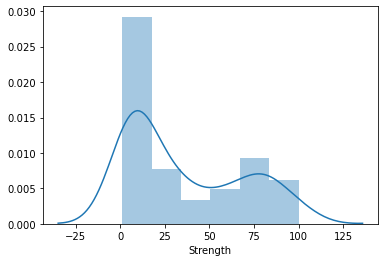

In [8]:
sns.distplot(df["Strength"])

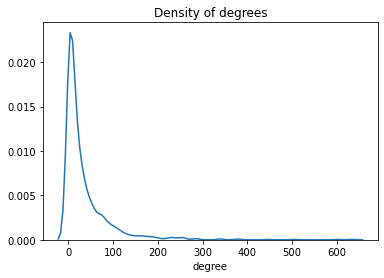

In [9]:
# density of degrees

# The WITH clause allows query parts to be chained together, 
# piping the results from one to be used as starting points or criteria in the next.
# size(()-[:RELATION]->(p)) = number of relation that goes into node p  
query =  """
MATCH (p)
WITH p, size(()-[:RELATION]->(p)) as degree
RETURN degree
"""
data = graph.run(query).to_data_frame()
ax = sns.distplot(data["degree"],hist=False)
ax.title.set_text("Density of degrees")

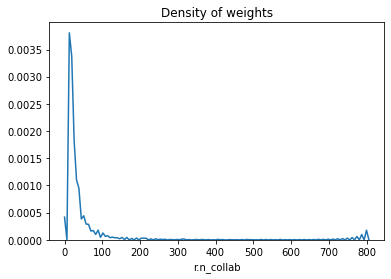

In [10]:
# density of weights

# Return the n_collab attribute from link = weight of the edge
query = """MATCH (a:Superhero)-[r:RELATION]-(b:Superhero) RETURN r.n_collab"""
data = graph.run(query).to_data_frame()
ax = sns.distplot(data["r.n_collab"],hist=False)
ax.title.set_text("Density of weights")

In [11]:
# TOP 10

# ORDER BY attribute of a node
# Only 10 result

query = """MATCH (a:Superhero)
WHERE exists(a.Total)
RETURN a
ORDER BY a.Total DESC
LIMIT 10"""
data = graph.run(query).to_data_frame()
list(data["a"])

[Node('Superhero', Combat=85, Durability=110, Intelligence=88, Power=100, Speed=100, Strength=85, Total=568, id_=1010764, name='Stardust'),
 Node('Superhero', Combat=70, Durability=100, Intelligence=100, Power=100, Speed=83, Strength=100, Total=553, id_=1009312, name='Galactus'),
 Node('Superhero', Combat=80, Durability=100, Intelligence=88, Power=100, Speed=83, Strength=95, Total=546, id_=1009280, name='Dormammu'),
 Node('Superhero', Combat=85, Durability=100, Intelligence=69, Power=100, Speed=92, Strength=100, Total=546, id_=1009664, name='Thor'),
 Node('Superhero', Combat=70, Durability=100, Intelligence=100, Power=100, Speed=67, Strength=80, Total=517, id_=1009496, name='Jean Grey'),
 Node('Superhero', Combat=70, Durability=100, Intelligence=100, Power=100, Speed=67, Strength=80, Total=517, id_=1009327, name='Jean Grey'),
 Node('Superhero', Combat=85, Durability=100, Intelligence=88, Power=100, Speed=47, Strength=85, Total=505, id_=1009483, name='Onslaught'),
 Node('Superhero', Com

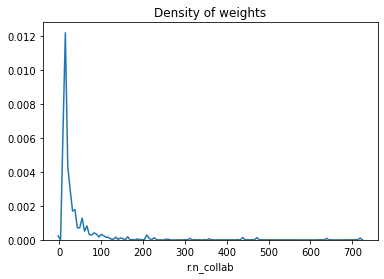

In [12]:
# Does total strength affect collaboration ? seems not like it

# One way is to test if strong heroes have a different density
query = """MATCH (a:Superhero)-[r:RELATION]-(b:Superhero) WHERE a.Total > 480 RETURN a.name,r.n_collab"""
data = graph.run(query).to_data_frame()
ax = sns.distplot(data["r.n_collab"],hist=False)
ax.title.set_text("Density of weights")

In [13]:
# Sometimes delete all can be slow, remove one by one this way:
import py2neo

graph = py2neo.Graph("bolt://localhost:7687", auth=("tutorial", "password_tuts"), name="mcu")

query = """
MATCH(p:Superhero)
WITH count(p) AS n_node
RETURN n_node
"""

data = graph.run(query)
n_node = next(data)["n_node"]

query = """
MATCH(p:Superhero)
RETURN p.id_
"""

# Returns a generator
data = graph.run(query)

#iterate through all elements
iteration = 0
pbar = tqdm.tqdm(total=n_node)

for i in range(n_node):
    Superhero = next(data)
    query = """
    MATCH (p:Superhero) 
    WHERE p.id_ = {}
    DETACH DELETE p
    """.format(Superhero["p.id_"])
    iteration += 1
    pbar.update(1)
    graph.run(query)


100%|██████████████████████████████████████████████████████████████████████████████| 1170/1170 [00:30<00:00, 96.01it/s]

### Exercises

#### CRUD operations:


**TODO 1**: You will continue to work on the MCU network for a while. Who are the 10 fastest in the MCU ? Are they related to each other ?

**TODO 2**: How many have collaborated atleast more than 10 times with another superhero?

**TODO 3**: Did the weakest of the MCU collaborated with the strongest ?

**TODO 4**: Give a stats that interests you !

**TODO 5**: Create a new db called "master". Create a graph from the M1 class with name and random age between 20 and 30, Group of 3 that collab (undirected relation).

**TODO 6**: Get the age for people YOU collaborate with.

**TODO 7**: Get nodes with age > 25.

### Real world problem:

**TODO 8**: Using the downloaded data in TODO 11 of chapter II, create a collaboration network between authors for papers after 2021 (same author if same name). Insert it in neo4j in a db called "arxiv".

**TODO 9**: Get the density of degrees of the collaboration network

**TODO 10**: Do a for loop for i in range(500) for each i remove nodes with a degree less than i.
